In [45]:
# Import required libaries
import numpy as np
import matplotlib.pyplot as plt
# Import data from keras
from keras.datasets import mnist # 28x28 images handwritten images of numbers 0-9
import tensorflow as tf
import seaborn as sns
%matplotlib inline

In [9]:
# Split the MNIST data into train and test sets.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [10]:
# Let's print the shape before we normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)
print(X_train[0])
# Here 0 as black and number close to 255 are visible in white

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   

(28, 28)


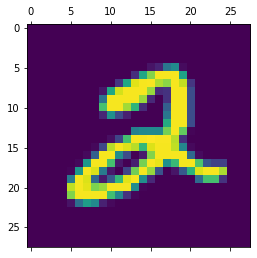

In [11]:
print(X_train[5].shape) # Each image is 28x28
# Let's plot a training image
plt.matshow(X_train[5])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

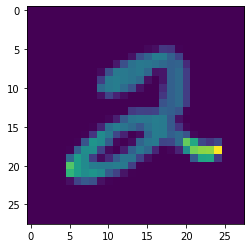

In [15]:
# Now we can normalize the data to get convert value between 0 and 1 else we will get low accuracy
X_train_normalized = tf.keras.utils.normalize(X_train, axis=1)
X_test_normalized = tf.keras.utils.normalize(X_test, axis=1)
print(X_train_normalized[5])
plt.imshow(X_train_normalized[5])

In [16]:
# Build the models(1 input and ouput layer and 2 hidden layers)

# We will use feed forward model i.e sequential model
model = tf.keras.models.Sequential()
# Now we need to flatten the input layer as images are 28x28, make it a flat 1x784 so there can be 784 neurons in i/p layer
model.add(tf.keras.layers.Flatten()) # For input layer

# We will now add Dense hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # For hidden layer; Dense signify all the neurons are connected to all the neurons in the next layer
# Add another identical layer for good measure.
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# Output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # 10 signify count of output layer neurons

In [17]:
# After model we need configure the learning process using .compile() for training the model
# Here we specify our loss function
model.compile(optimizer="adam", metrics=['accuracy'], loss="sparse_categorical_crossentropy")
# We have used Adnam optimizer: https://arxiv.org/abs/1412.6980v8
# categorical_crossentropy is one of the popular: https://keras.io/losses/
# sparse_categorical_crossentropy: categorical: as out output is categorical(0-9), sparse: Output variable is integer, if array is there then we don't use sparse

In [22]:
# Training the model and saving metrics in history
history = model.fit(X_train_normalized, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5061 - accuracy: 0.8693
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1448 - accuracy: 0.9575
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0974 - accuracy: 0.9705


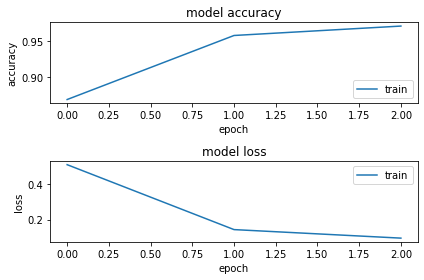

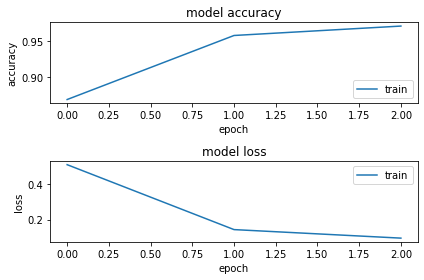

In [23]:
# Now we can plot metrics for each epoch
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [25]:
# Evaluate accuracy for testing data
_loss, _accuracy = model.evaluate(X_test_normalized, y_test)

print(_loss)
print(_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1039 - accuracy: 0.9675
0.10386919975280762
0.9674999713897705


In [37]:
# Now make predictions for test data
y_pred = model.predict(X_test_normalized)

In [38]:
# See what we are getting for a random number
y_pred[5]

array([1.0546037e-06, 9.9945909e-01, 9.0127423e-06, 1.0258131e-04,
       3.9753493e-05, 2.6960879e-06, 6.7261760e-07, 2.2980728e-04,
       1.4567541e-04, 9.5260912e-06], dtype=float32)

In [39]:
# Now to get element with the maximum probability among the elements in array
print(np.argmax(y_pred[5]))

1


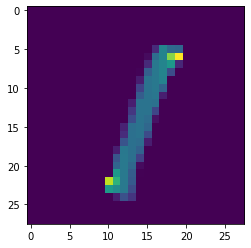

In [40]:
# Display img using matplotlib and check whether prediction was right or not
plt.imshow(X_test_normalized[5])
plt.show()

In [42]:
# To see confusion matrix we need to convert y_pred to integer labels from float values
y_predicted_labels = [np.argmax(i) for i in y_pred]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [44]:
conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    1,    0,    0,    0,    1,    2,    2,    1,    2],
       [   0, 1114,    3,    3,    0,    0,    2,    0,   13,    0],
       [   5,    1,  984,   19,    1,    0,    1,    6,   14,    1],
       [   0,    0,    2,  976,    0,    5,    0,    8,    9,   10],
       [   3,    1,    6,    0,  948,    0,    3,    0,    3,   18],
       [   4,    0,    0,   20,    1,  847,    2,    1,    6,   11],
       [  10,    3,    2,    1,    3,    3,  931,    0,    5,    0],
       [   3,    8,   10,    6,    2,    0,    0,  985,    1,   13],
       [   4,    1,    1,    9,    7,    3,    2,    3,  931,   13],
       [   5,    4,    0,    4,    5,    1,    0,    1,    1,  988]],
      dtype=int32)>

Text(69.0, 0.5, 'Actual')

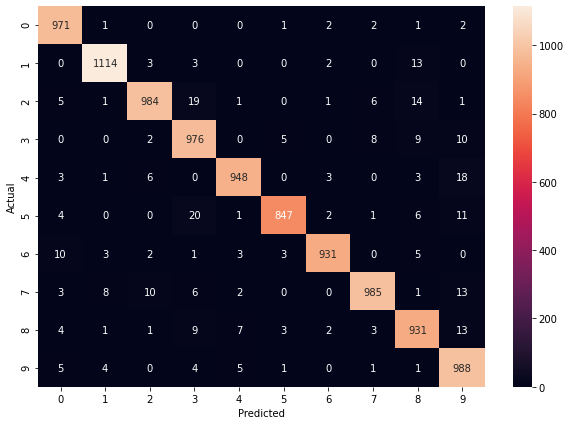

In [46]:
# Now to visualize this confusion matrix better we will use seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
# Below everything except the right diagonal are errors